# MNIST Data

In [1]:
# https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [1]:
# Loading data
# data from kaggle: https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dO = pd.read_csv('/Users/anand/Documents/Datasets/digit-recognizer/train.csv')
dO.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Saving the label into a variable l
l = dO['label']

In [3]:
# Drop the label feature and stroe the pixel data in d
d = dO.drop('label', axis=1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


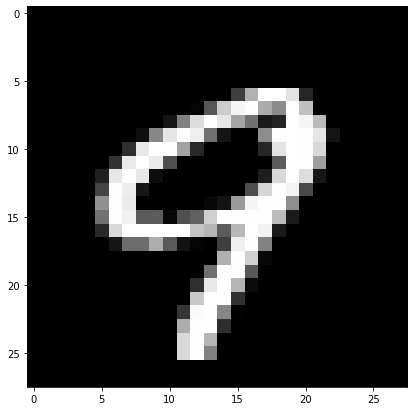

In [5]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 100

# grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshape from 1D to 2D
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

In [6]:
print(l[idx])

9


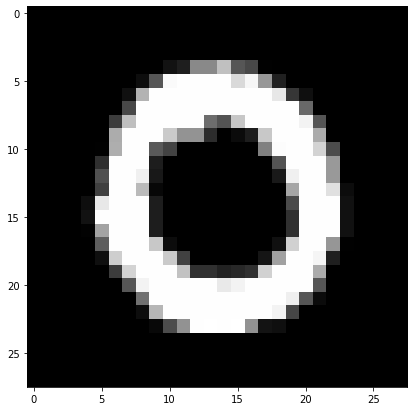

0


In [7]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 1

# grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshape from 1D to 2D
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

# 2D Vizualization using PCA

In [8]:
# Pick the first 15K data-points to work on for time-efficiency
# Exercise: Perform the same analysis on all of the 42K data-points


In [10]:
labels = l.head(15000)
data = d.head(15000)

In [11]:
print(l.shape, d.shape)

(42000,) (42000, 784)


In [13]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


In [14]:
# Find the co-variance matrix which is A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

covar_matrix.shape

(784, 784)